In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import time
%matplotlib inline

In [2]:
#use raw_data
d=pd.read_csv('./trajectories(table 5)_training.csv')
v=pd.read_csv('./training_20min_avg_volume.csv')

# relationship between holiday and travel time

In [3]:
v.head()

,tollgate_id,time_window,direction,volume
0,1,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",1,140
1,1,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0,13
2,3,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",1,181
3,3,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0,17
4,2,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0,2


In [4]:
#date extraction
a=[]
b=[]
for c in v['time_window']:
    c1=datetime.strptime(c[1:20], "%Y-%m-%d %H:%M:%S")
    a.append(c1)
    b.append(c1.weekday()+1)
v['date_time']=a
v['weekday']=b
v['date']=v['date_time'].dt.date
v['month']=v['date_time'].dt.month
v['day']=v['date_time'].dt.day
v['hour']=v['date_time'].dt.hour
v['time']=v['date_time'].dt.minute
v.head()

,tollgate_id,time_window,direction,volume,date_time,weekday,date,month,day,hour,time
0,1,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",1,140,2016-09-19,1,2016-09-19,9,19,0,0
1,1,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0,13,2016-09-19,1,2016-09-19,9,19,0,0
2,3,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",1,181,2016-09-19,1,2016-09-19,9,19,0,0
3,3,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0,17,2016-09-19,1,2016-09-19,9,19,0,0
4,2,"[2016-09-19 00:00:00,2016-09-19 00:20:00)",0,2,2016-09-19,1,2016-09-19,9,19,0,0


In [5]:
#tollgate_id-direction extraction
v11=v.loc[(v['tollgate_id']==1)&(v['direction']==1)]
v10=v.loc[(v['tollgate_id']==1)&(v['direction']==0)]
v21=v.loc[(v['tollgate_id']==2)&(v['direction']==1)]
v20=v.loc[(v['tollgate_id']==2)&(v['direction']==0)]
v31=v.loc[(v['tollgate_id']==3)&(v['direction']==1)]
v30=v.loc[(v['tollgate_id']==3)&(v['direction']==0)]

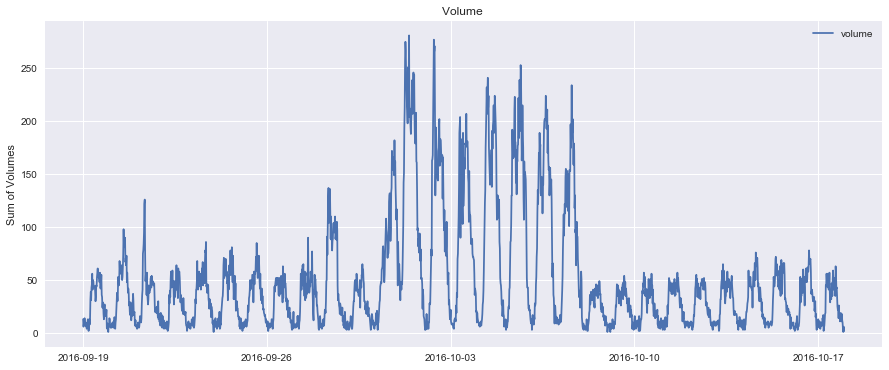

In [6]:
def plot_volume(area):
    plt.figure(figsize=(15,6))
    plt.plot(area['date_time'],area['volume'],label='volume')
    plt.legend(loc='best')
    plt.title('Volume ')
    plt.ylabel('Sum of Volumes')
    plt.show()
plot_volume(v10)

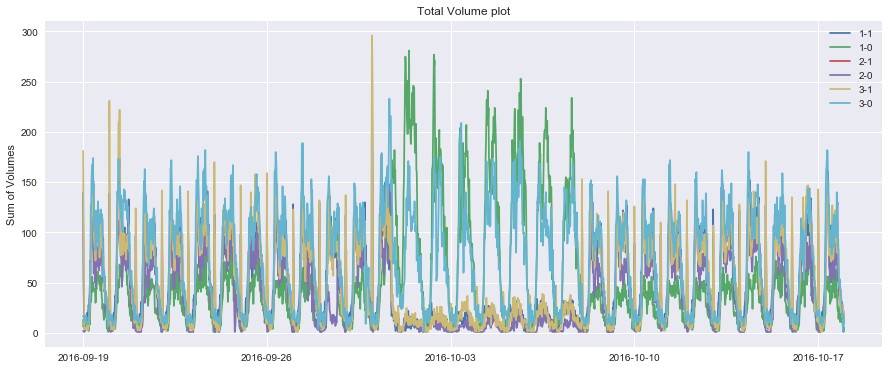

In [7]:
plt.figure(figsize=(15,6))
plt.plot(v11['date_time'],v11['volume'],label='1-1')
plt.plot(v10['date_time'],v10['volume'],label='1-0')
plt.plot(v21['date_time'],v21['volume'],label='2-1')
plt.plot(v20['date_time'],v20['volume'],label='2-0')
plt.plot(v31['date_time'],v31['volume'],label='3-1')
plt.plot(v30['date_time'],v30['volume'],label='3-0')
plt.legend(loc='best')
plt.title('Total Volume plot')
plt.ylabel('Sum of Volumes')
plt.show()

In [8]:
d.head()

,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98


In [9]:
d.dtypes

intersection_id     object
tollgate_id          int64
vehicle_id           int64
starting_time       object
travel_seq          object
travel_time        float64
dtype: object

In [10]:
#date extraction
d['starting_time']=d['starting_time'].astype(np.datetime64)
d['date']=d['starting_time'].dt.date
d['month']=d['starting_time'].dt.month
d['day']=d['starting_time'].dt.day
d['hour']=d['starting_time'].dt.hour
d['time']=d['starting_time'].dt.minute
d['weekday']=d['starting_time'].dt.weekday+1
d.head()

,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time,date,month,day,hour,time,weekday
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85,2016-07-19,7,19,0,14,2
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79,2016-07-19,7,19,0,35,2
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76,2016-07-19,7,19,0,37,2
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05,2016-07-19,7,19,0,37,2
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98,2016-07-19,7,19,0,56,2


In [11]:
A2=d.loc[(d['intersection_id']=='A')&(d['tollgate_id']==2)]
A3=d.loc[(d['intersection_id']=='A')&(d['tollgate_id']==3)]
B1=d.loc[(d['intersection_id']=='B')&(d['tollgate_id']==1)]
B3=d.loc[(d['intersection_id']=='B')&(d['tollgate_id']==3)]
C1=d.loc[(d['intersection_id']=='C')&(d['tollgate_id']==1)]
C3=d.loc[(d['intersection_id']=='C')&(d['tollgate_id']==3)]

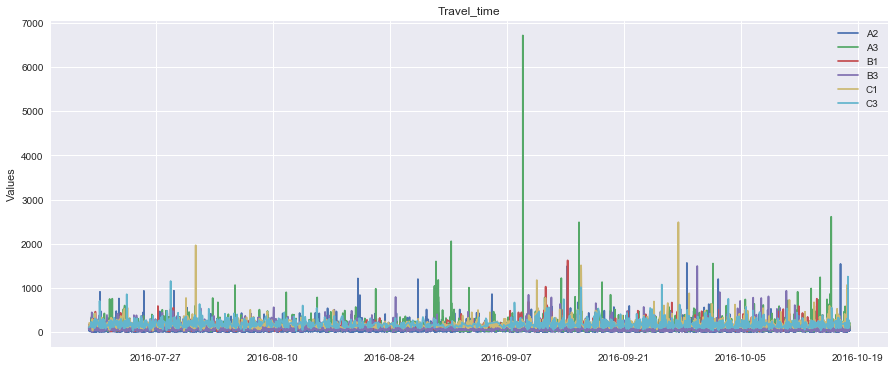

In [12]:
plt.figure(figsize=(15,6))
plt.plot(A2['starting_time'],A2['travel_time'],label='A2')
plt.plot(A3['starting_time'],A3['travel_time'],label='A3')
plt.plot(B1['starting_time'],B1['travel_time'],label='B1')
plt.plot(B3['starting_time'],B3['travel_time'],label='B3')
plt.plot(C1['starting_time'],C1['travel_time'],label='C1')
plt.plot(C3['starting_time'],C3['travel_time'],label='C3')
plt.legend(loc='best')
plt.title('Travel_time')
plt.ylabel('Values')
plt.show()

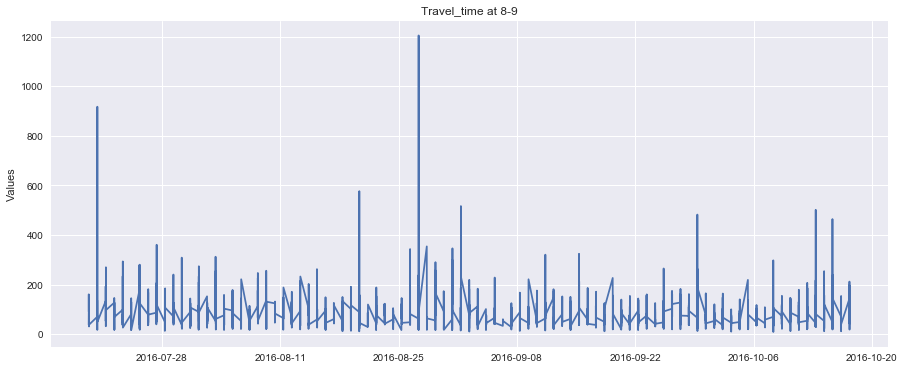

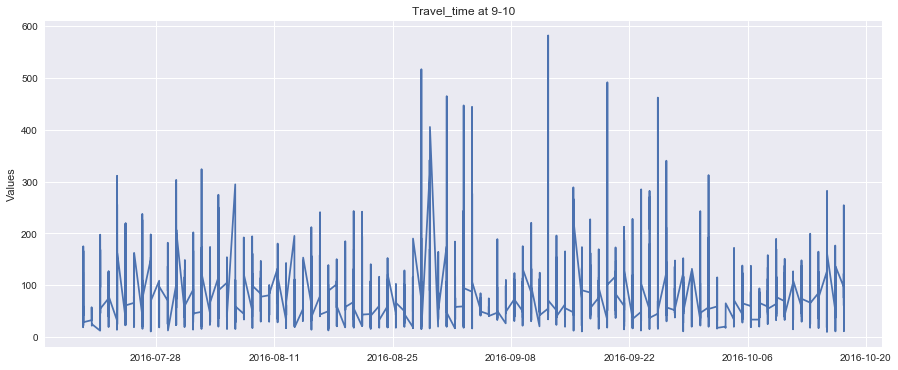

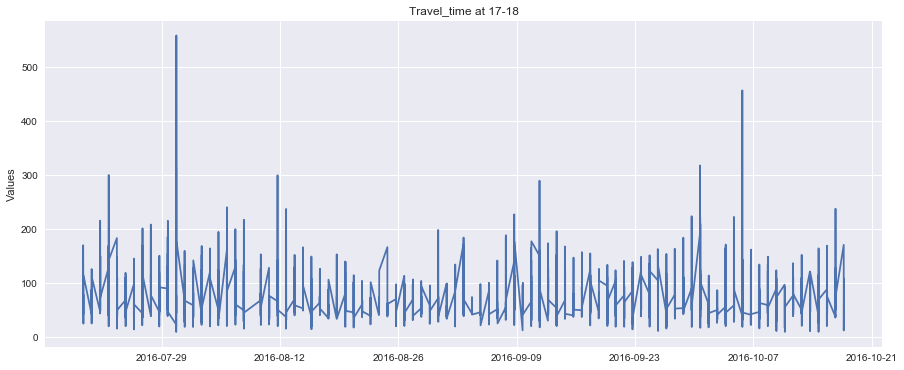

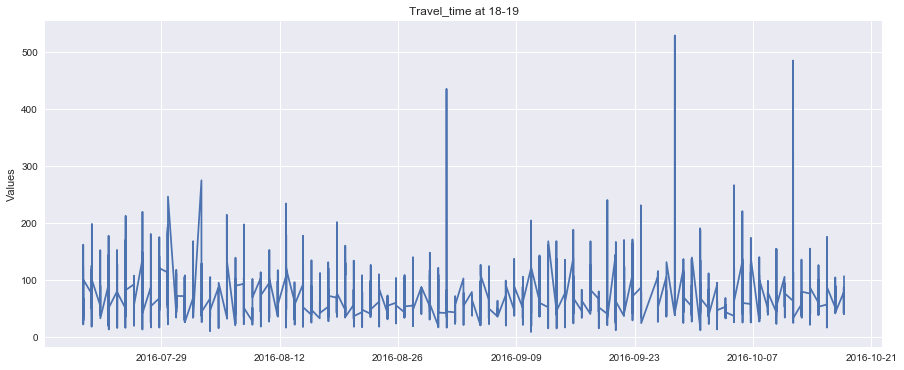

In [13]:
def plot_travel_time(area):
    plt.figure(figsize=(15,6))
    plt.plot(area.loc[area['hour']==8]['starting_time'],area.loc[area['hour']==8]['travel_time'], label='8-9')
    plt.title('Travel_time at 8-9')
    plt.ylabel('Values')
    plt.show()
    plt.figure(figsize=(15,6))
    plt.plot(area.loc[area['hour']==9]['starting_time'],area.loc[area['hour']==9]['travel_time'], label='9-10')
    plt.title('Travel_time at 9-10')
    plt.ylabel('Values')
    plt.show()
    plt.figure(figsize=(15,6))
    plt.plot(area.loc[area['hour']==17]['starting_time'],area.loc[area['hour']==17]['travel_time'], label='17-18')
    plt.title('Travel_time at 17-18')
    plt.ylabel('Values')
    plt.show()
    plt.figure(figsize=(15,6))
    plt.plot(area.loc[area['hour']==18]['starting_time'],area.loc[area['hour']==18]['travel_time'], label='18-19')
    plt.title('Travel_time at 18-19')
    plt.ylabel('Values')
    plt.show()
plot_travel_time(A2)

# Correlation

In [14]:
#use processed data
data=pd.read_csv('./training_data.csv')
A2=data.loc[(d['intersection_id']=='A')&(data['tollgate_id']==2)]
A3=data.loc[(d['intersection_id']=='A')&(data['tollgate_id']==3)]
B1=data.loc[(d['intersection_id']=='B')&(data['tollgate_id']==1)]
B3=data.loc[(d['intersection_id']=='B')&(data['tollgate_id']==3)]
C1=data.loc[(d['intersection_id']=='C')&(data['tollgate_id']==1)]
C3=data.loc[(d['intersection_id']=='C')&(data['tollgate_id']==3)]
data.head()

,intersection_id,tollgate_id,time_window,t1,t2,t3,deltat1,deltat2,avg_travel_time,date,...,time,weekday,pressure,sea_pressure,wind_direction,wind_speed,temperature,rel_humidity,precipitation,check
0,A,2,"[2016-07-19 00:35:00,2016-07-19 00:40:00)",57.503846,48.507273,51.819286,8.996573,-3.312013,58.05,2016-07-19 00:35:00,...,35,2,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,7
1,A,2,"[2016-07-19 01:35:00,2016-07-19 01:40:00)",62.332222,52.897778,63.436250,9.434444,-10.538472,56.87,2016-07-19 01:35:00,...,35,2,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,19
2,A,2,"[2016-07-19 01:40:00,2016-07-19 01:45:00)",56.870000,52.897778,63.436250,3.972222,-10.538472,35.38,2016-07-19 01:40:00,...,40,2,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,20
3,A,2,"[2016-07-19 01:45:00,2016-07-19 01:50:00)",35.380000,56.870000,63.436250,-21.490000,-6.566250,130.43,2016-07-19 01:45:00,...,45,2,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,21
4,A,2,"[2016-07-19 01:50:00,2016-07-19 01:55:00)",130.430000,35.380000,56.870000,95.050000,-21.490000,67.41,2016-07-19 01:50:00,...,50,2,1000.9,1005.8,219.0,3.3,27.5,81.0,0.0,22


In [15]:
def Correlation_matrix(area):
    colormap = plt.cm.viridis
    plt.figure(figsize=(12,12))
    plt.title('Correlation of Features', y=1.05, size=15)
    sns.heatmap(area.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

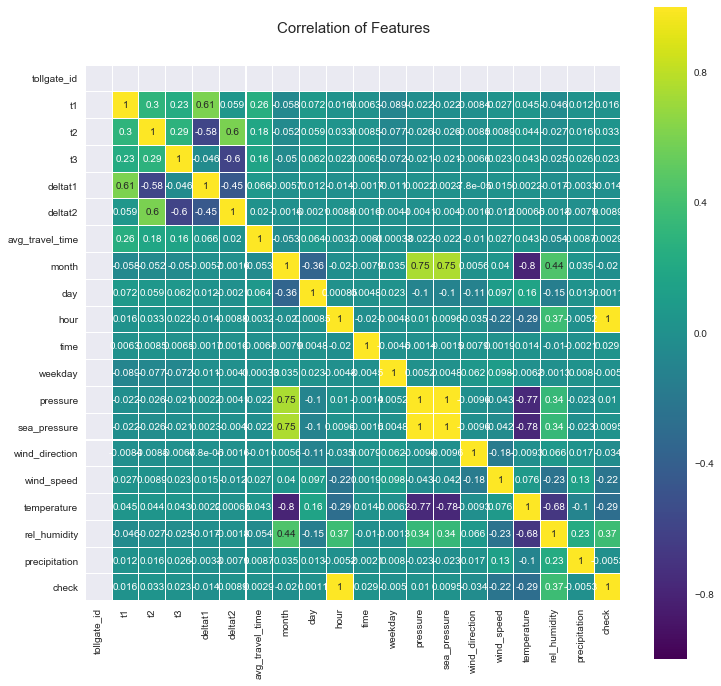

In [16]:
Correlation_matrix(A2)

In [17]:
def Correlation_bar(area):
    plt.figure(figsize=(20,12))
    plt.title('Correlation of Features', y=1.05, size=15)
    sns.barplot(data=pd.DataFrame(area.corr()['avg_travel_time']).drop('avg_travel_time').T,)
    #pd.DataFrame(area.corr()['avg_travel_time']).drop('avg_travel_time').plot.bar(y='avg_travel_time',figsize=(15,10))

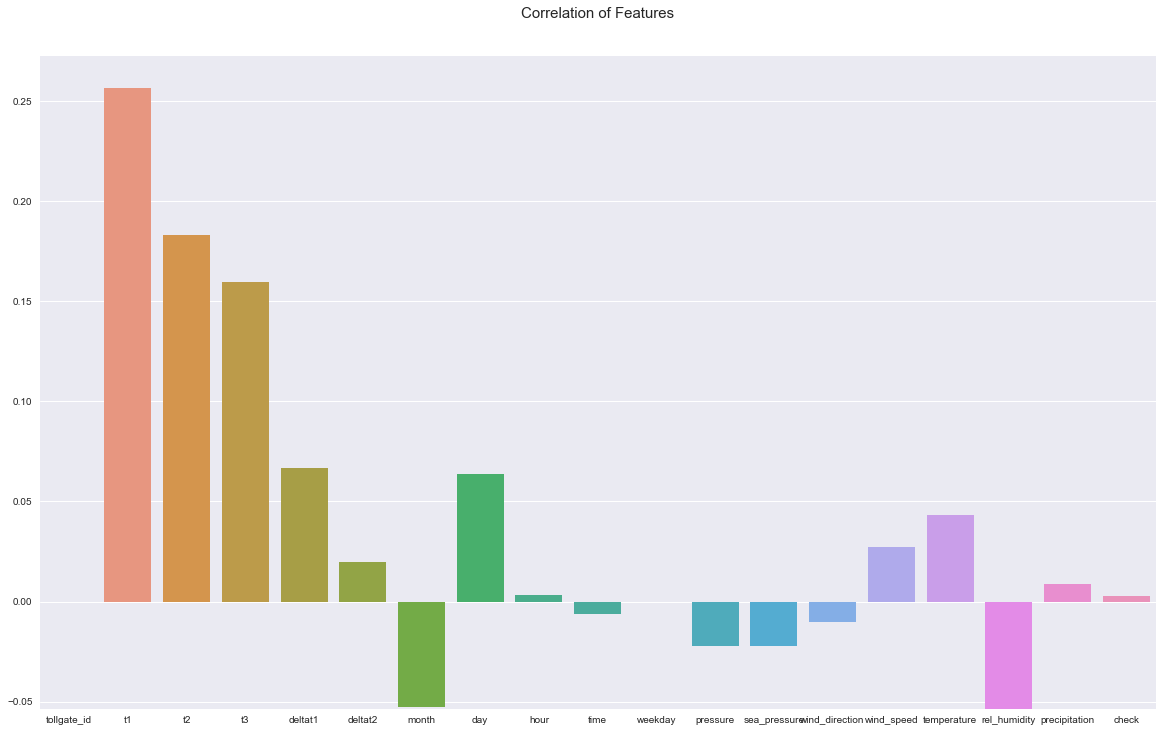

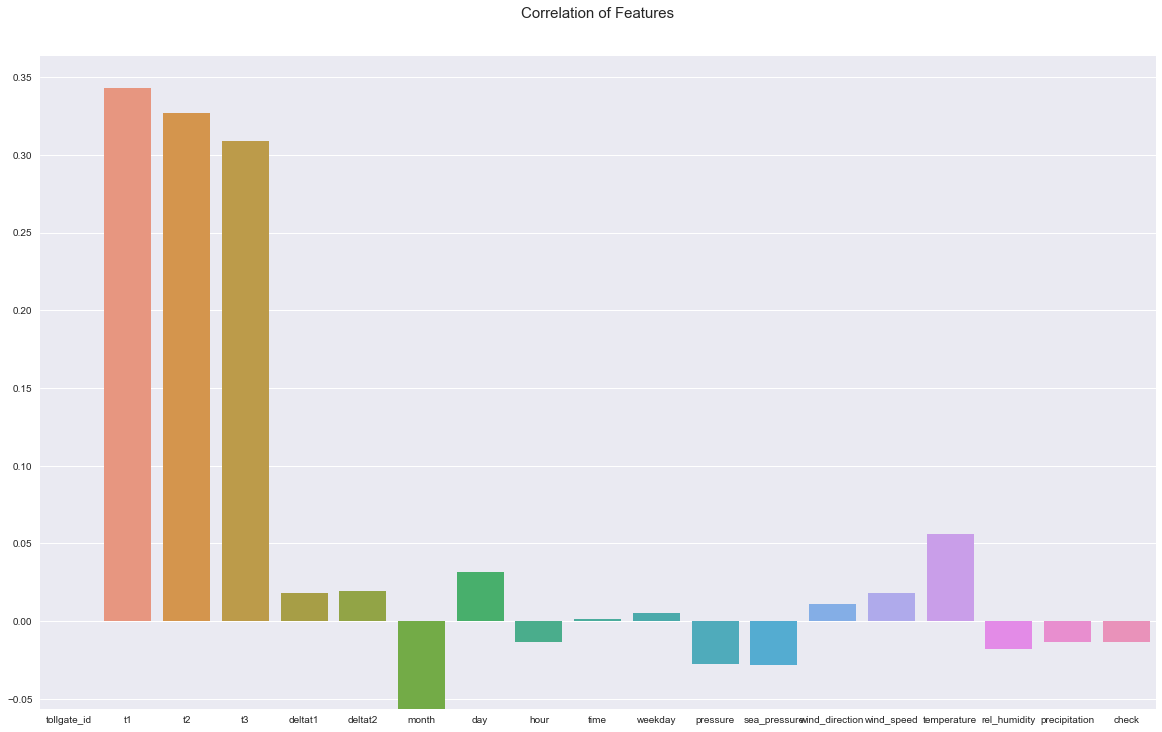

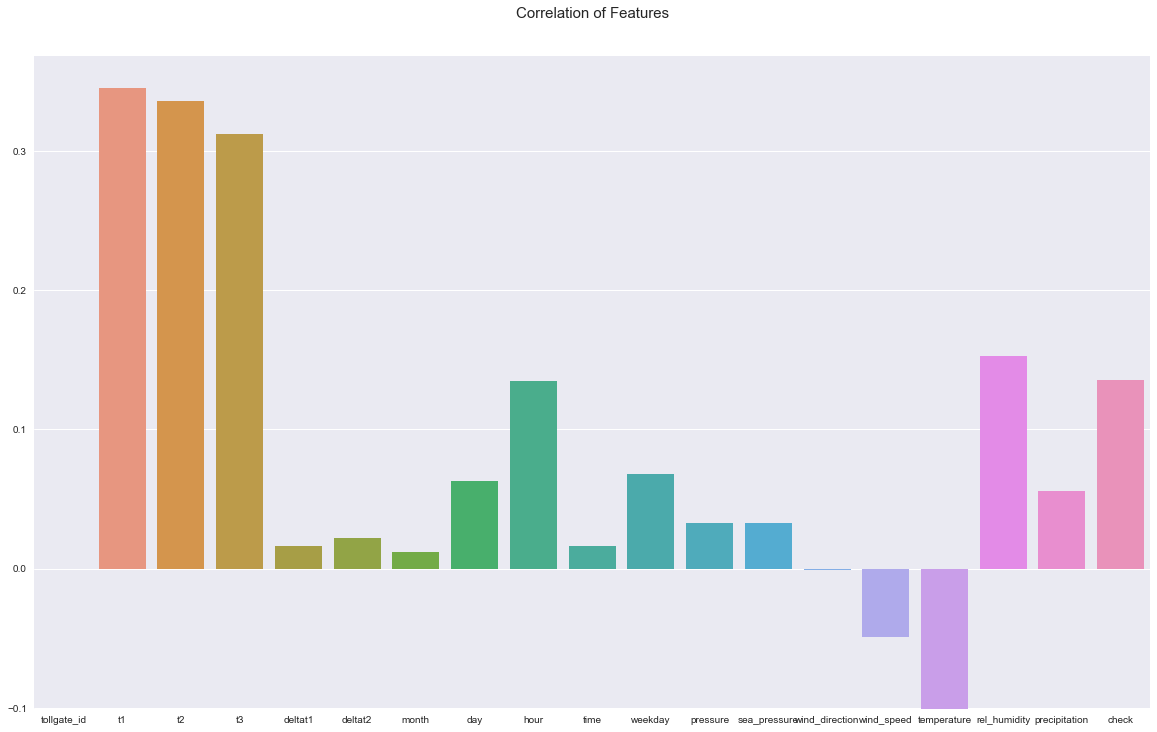

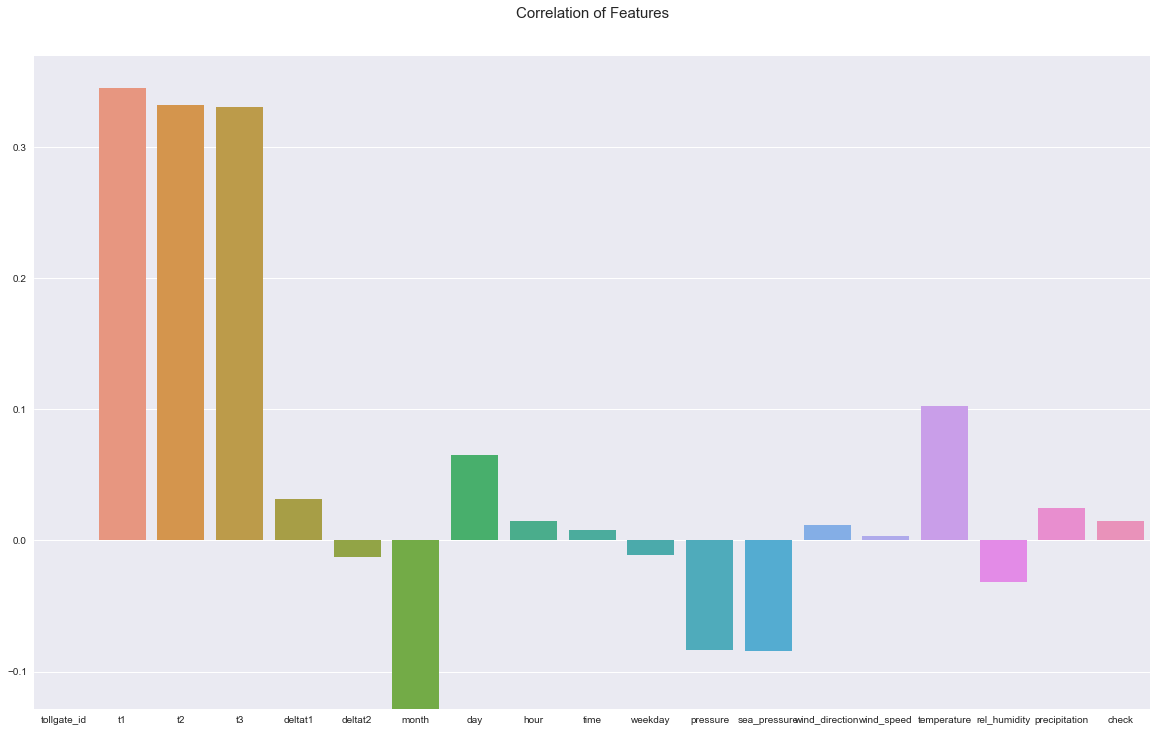

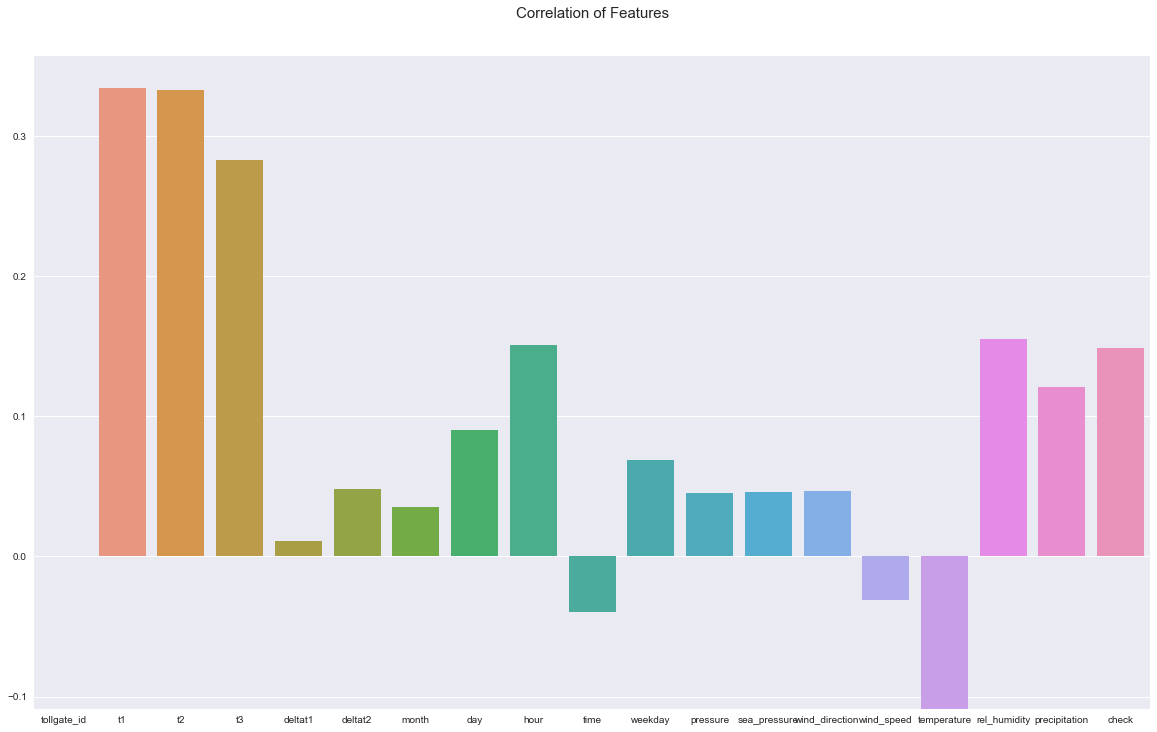

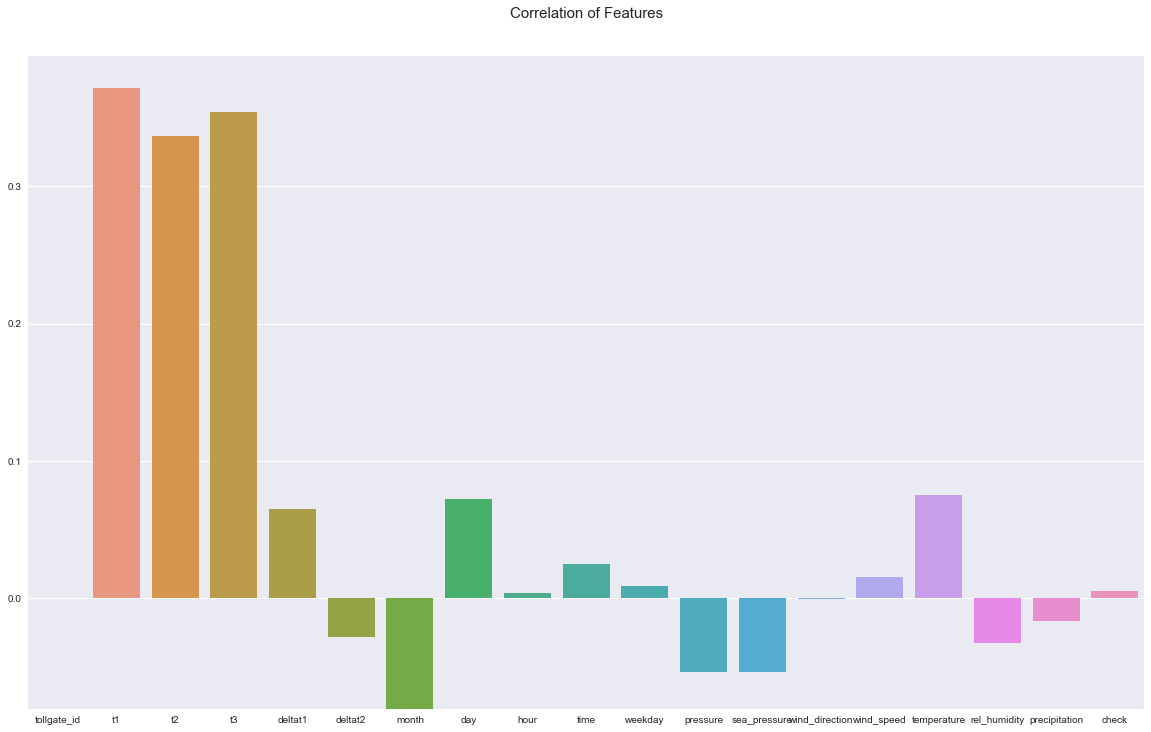

In [18]:
Correlation_bar(A2)
Correlation_bar(A3)
Correlation_bar(B1)
Correlation_bar(B3)
Correlation_bar(C1)
Correlation_bar(C3)

# # relationship between weekday and travel time

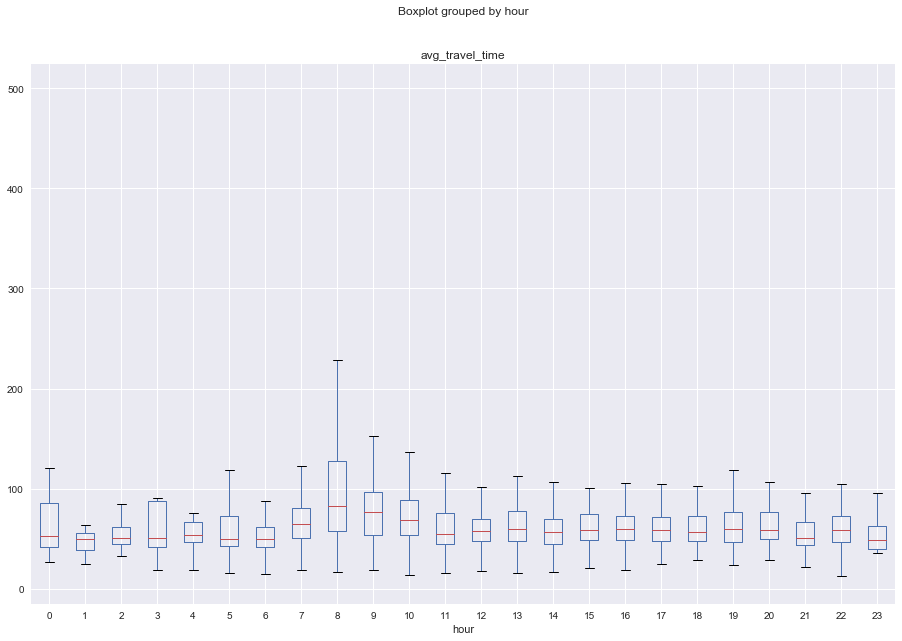

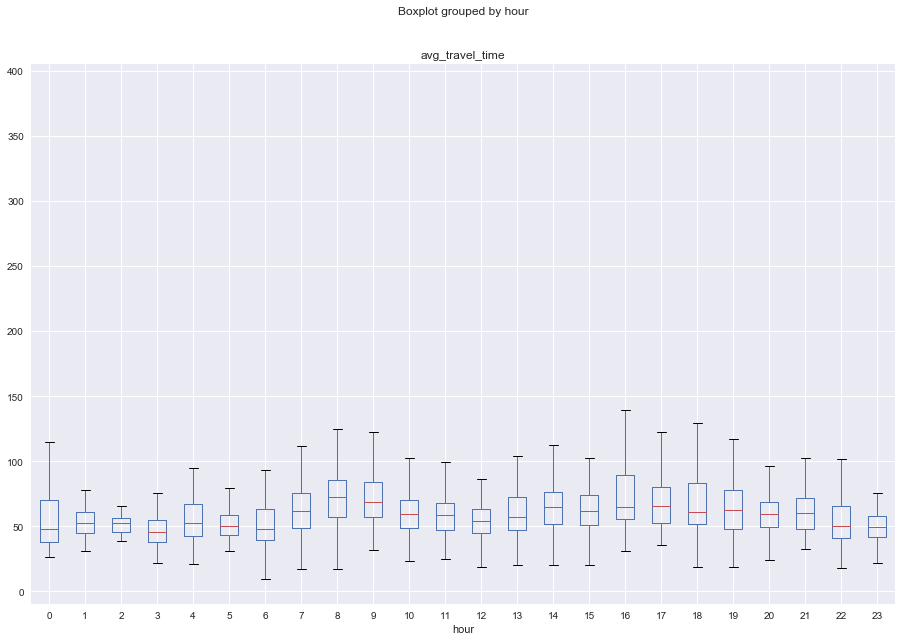

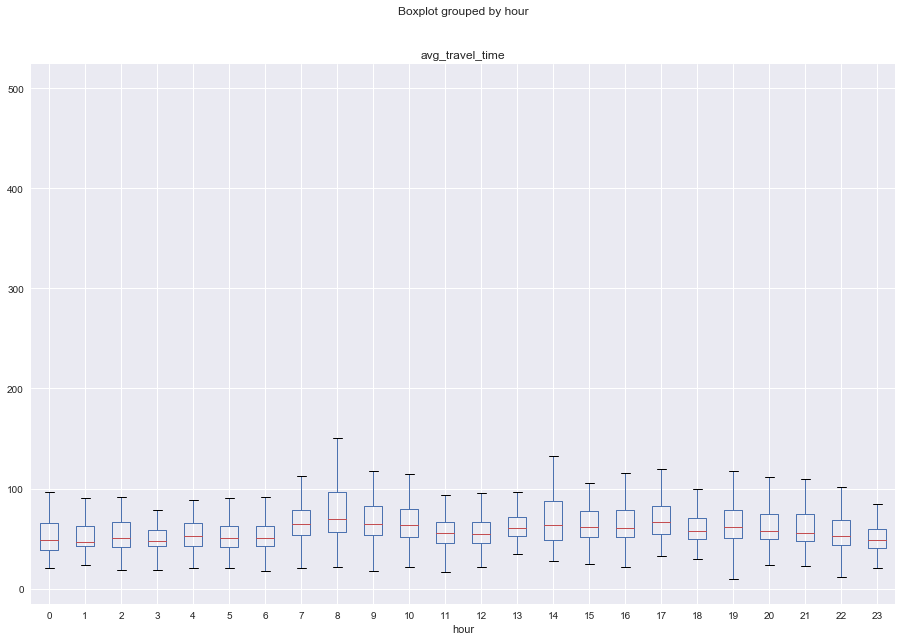

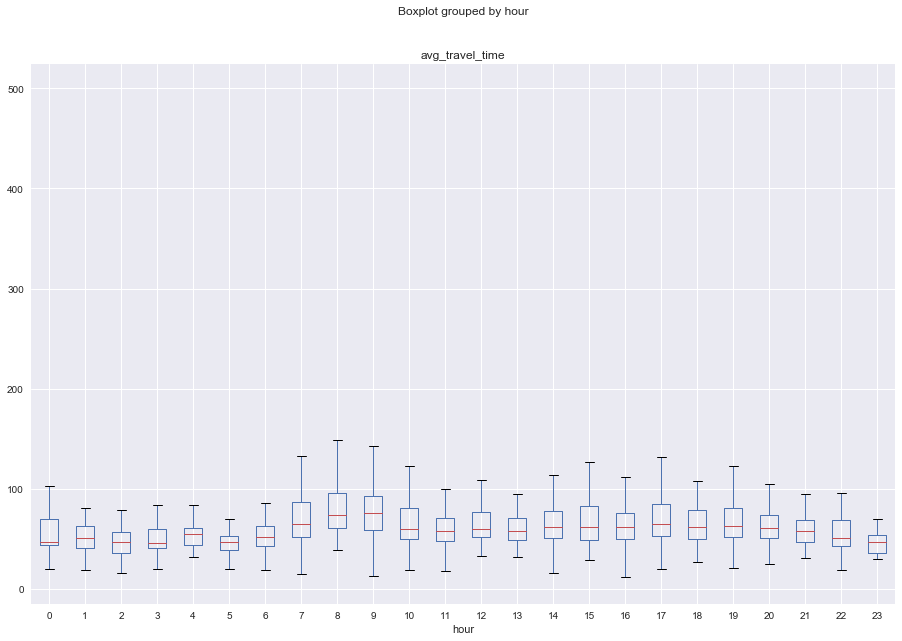

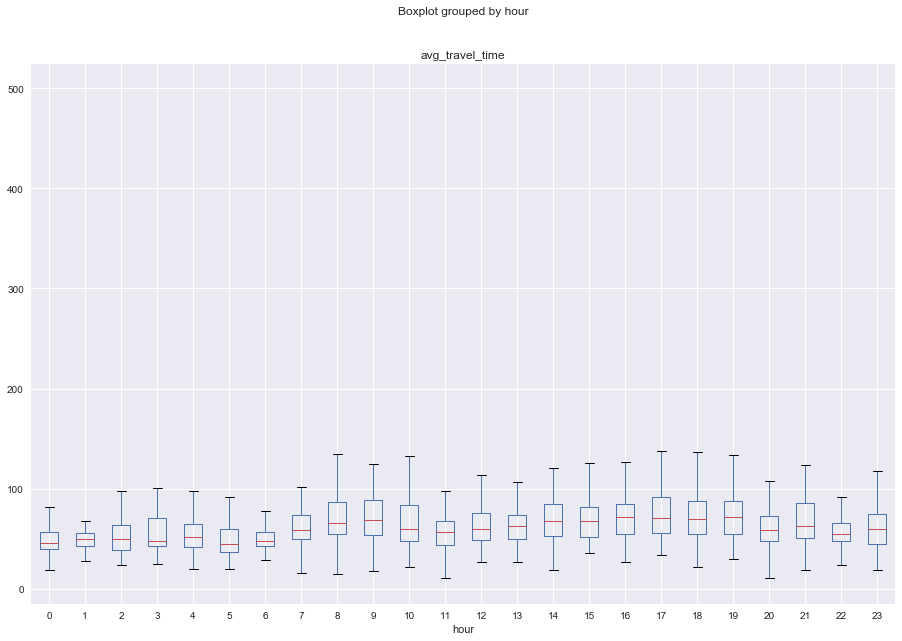

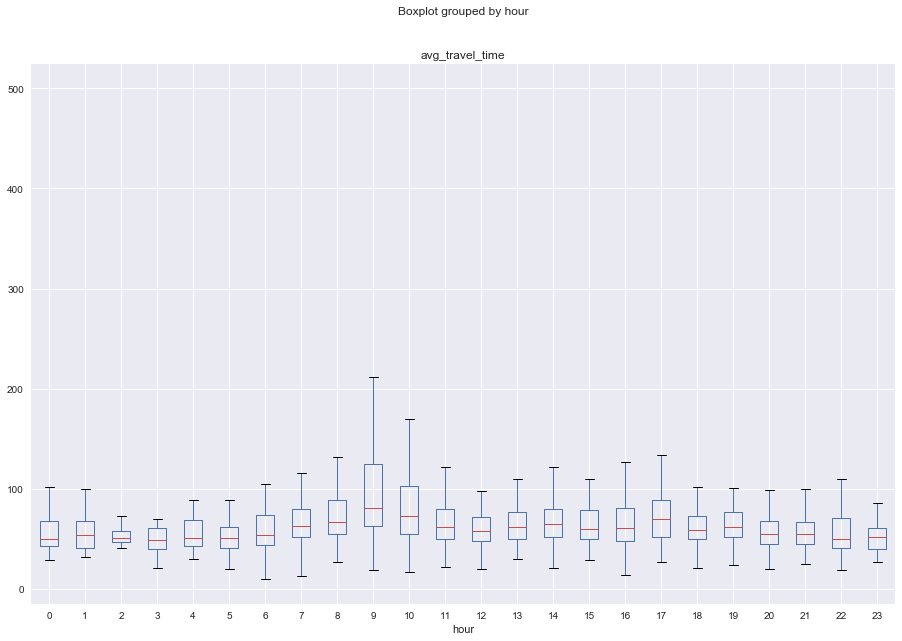

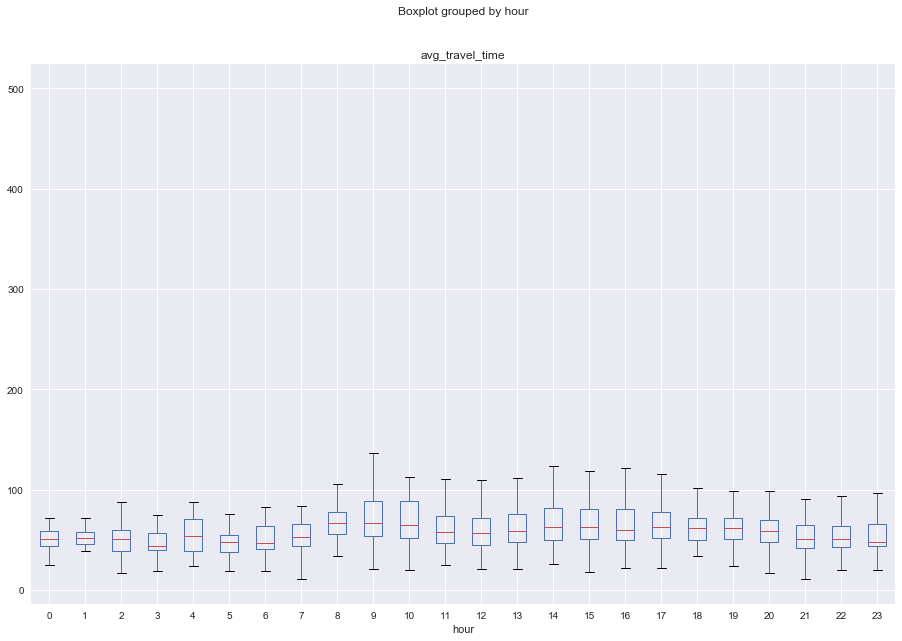

In [19]:
def boxplot_different_weekday(area):
    area.loc[area['weekday']==1].boxplot(column='avg_travel_time', by="hour",figsize=(15,10))
    area.loc[area['weekday']==2].boxplot(column='avg_travel_time', by="hour",figsize=(15,10))
    area.loc[area['weekday']==3].boxplot(column='avg_travel_time', by="hour",figsize=(15,10))
    area.loc[area['weekday']==4].boxplot(column='avg_travel_time', by="hour",figsize=(15,10))
    area.loc[area['weekday']==5].boxplot(column='avg_travel_time', by="hour",figsize=(15,10))
    area.loc[area['weekday']==6].boxplot(column='avg_travel_time', by="hour",figsize=(15,10))
    area.loc[area['weekday']==7].boxplot(column='avg_travel_time', by="hour",figsize=(15,10))
boxplot_different_weekday(A2)

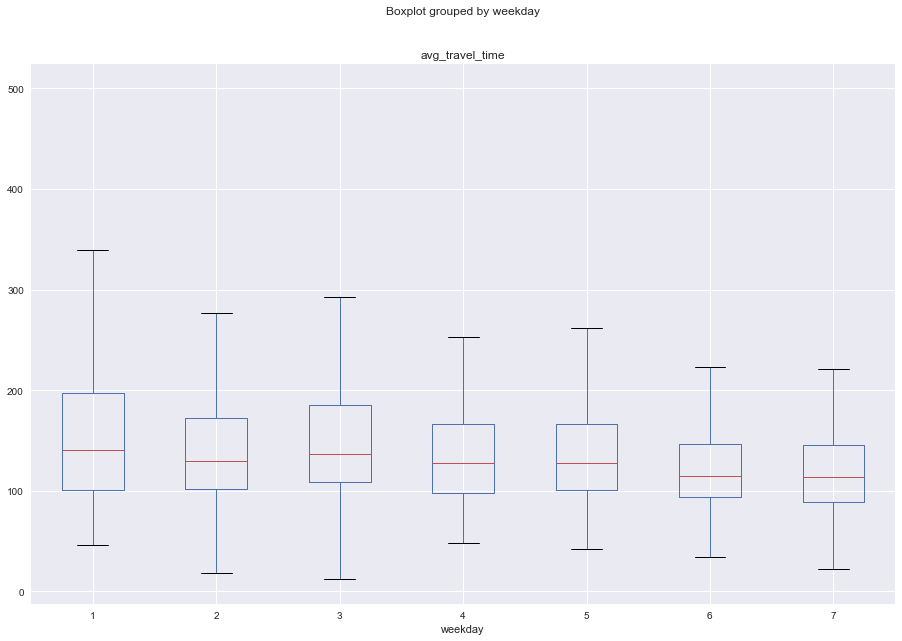

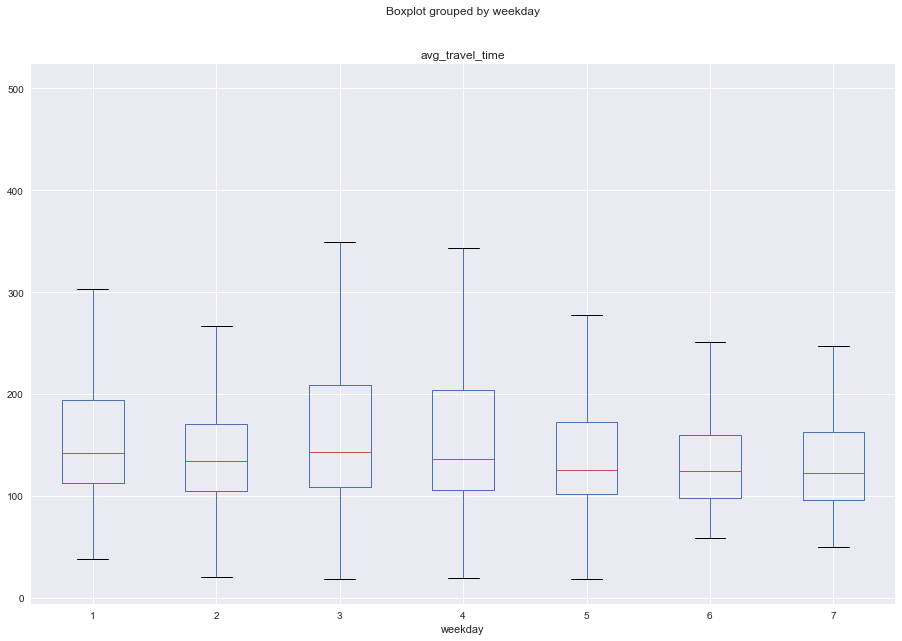

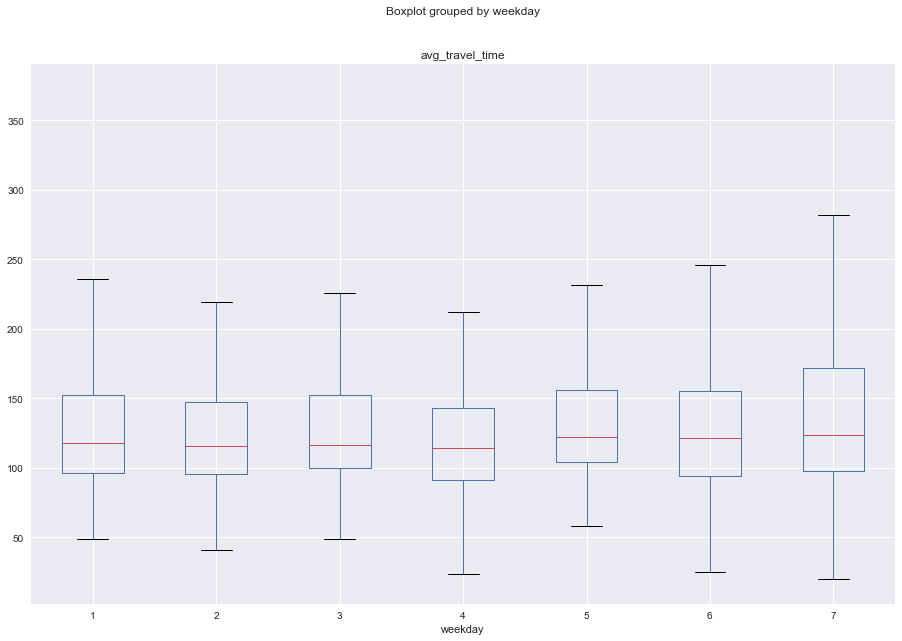

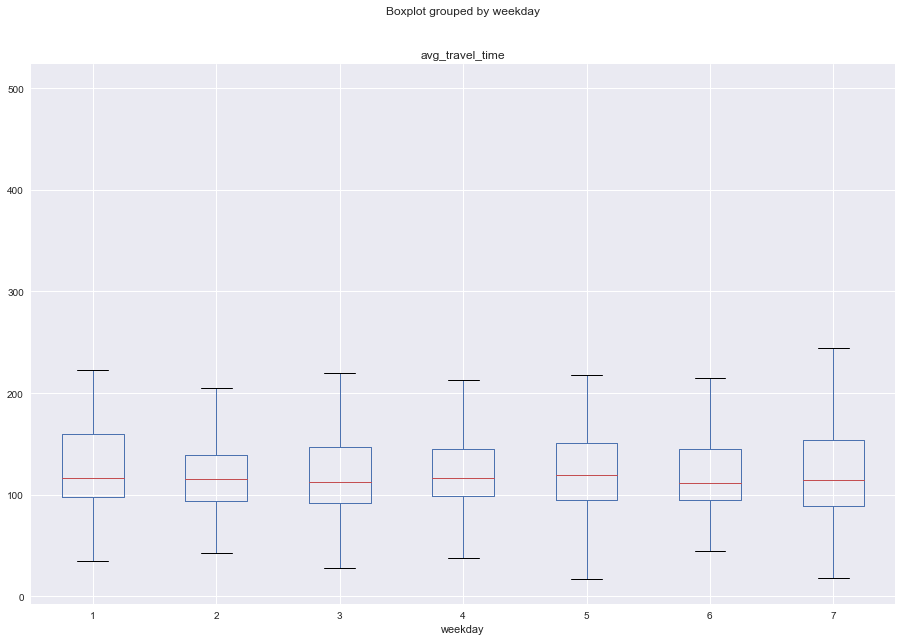

In [20]:
def boxplot_weekday(area):
    area.loc[area['hour']==8].boxplot(column='avg_travel_time', by="weekday",figsize=(15,10))
    area.loc[area['hour']==9].boxplot(column='avg_travel_time', by="weekday",figsize=(15,10))
    area.loc[area['hour']==17].boxplot(column='avg_travel_time', by="weekday",figsize=(15,10))
    area.loc[area['hour']==18].boxplot(column='avg_travel_time', by="weekday",figsize=(15,10))
boxplot_weekday(A3)

In [21]:
def calcuate_mean(area,hour):
    print 'avg_travel_time on {} to {} clock'.format(hour,hour+1)
    for c in range(1,8):
        value=area.loc[(area['weekday']==c)&(area['hour']==hour)]['avg_travel_time'].mean()
        print 'weekday {} : {}'.format(c,value)
calcuate_mean(A2,8)
calcuate_mean(A2,9)
calcuate_mean(A2,17)
calcuate_mean(A2,18)

avg_travel_time on 8 to 9 clock
weekday 1 : 95.0445945946
weekday 2 : 73.8875
weekday 3 : 84.7426595745
weekday 4 : 85.3528205128
weekday 5 : 76.3855555556
weekday 6 : 76.51
weekday 7 : 71.6418095238
avg_travel_time on 9 to 10 clock
weekday 1 : 84.6532038835
weekday 2 : 75.8274311927
weekday 3 : 74.9230909091
weekday 4 : 81.8111607143
weekday 5 : 72.7826890756
weekday 6 : 96.558442623
weekday 7 : 78.7411926606
avg_travel_time on 17 to 18 clock
weekday 1 : 62.07
weekday 2 : 70.216407767
weekday 3 : 70.7170588235
weekday 4 : 71.8503738318
weekday 5 : 78.1263636364
weekday 6 : 77.7745631068
weekday 7 : 67.8015217391
avg_travel_time on 18 to 19 clock
weekday 1 : 64.3957777778
weekday 2 : 68.7364835165
weekday 3 : 63.6635416667
weekday 4 : 66.0716190476
weekday 5 : 76.0823232323
weekday 6 : 64.3134444444
weekday 7 : 66.4779381443
